In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
# m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
# m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
# m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [2]:
m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p3kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p3oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p12kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p12oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p13kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p13oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p15kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p15oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p16kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p16oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p17kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p17oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p18kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p18oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p19kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p19oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p20kd = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m1p20oe = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')

In [3]:
m1p3kd[:][:,16] = m1p3kd[:][:,16]/10
m1p3oe[:][:,16] = m1p3oe[:][:,16]*10

m1p12kd[:][:,25] = m1p12kd[:][:,25]/10
m1p12oe[:][:,25] = m1p12oe[:][:,25]*10

m1p13kd[:][:,26] = m1p13kd[:][:,26]/10
m1p13oe[:][:,26] = m1p13oe[:][:,26]*10

m1p15kd[:][:,28] = m1p15kd[:][:,28]/10
m1p15oe[:][:,28] = m1p15oe[:][:,28]*10

m1p16kd[:][:,29] = m1p16kd[:][:,29]/10
m1p16oe[:][:,29] = m1p16oe[:][:,29]*10

m1p17kd[:][:,30] = m1p17kd[:][:,30]/10
m1p17oe[:][:,30] = m1p17oe[:][:,30]*10

m1p18kd[:][:,31] = m1p18kd[:][:,31]/10
m1p18oe[:][:,31] = m1p18oe[:][:,31]*10

m1p19kd[:][:,32] = m1p19kd[:][:,32]/10
m1p19oe[:][:,32] = m1p19oe[:][:,32]*10

m1p20kd[:][:,33] = m1p20kd[:][:,33]/10
m1p20oe[:][:,33] = m1p20oe[:][:,33]*10

In [ ]:
print(m1p19kd[:][:,32])
print(m1p19oe[:][:,32])

In [ ]:
print(m1p19kd[:][:,32])
print(m1p19oe[:][:,32])

In [4]:
t = np.linspace(0,1800,500)
m = model.components
print(list(model.initial_conditions))

[(A20(brip=None), Parameter('A20_0', 9075.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)), (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)), (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 22044.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0))]


In [5]:
solverwtm1 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=m2, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-16 22:29:22.747 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 22:29:23.524 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 22:29:23.643 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 22:29:23.861 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 22:33:31.424 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 22:33:31.426 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 22:33:33.962 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


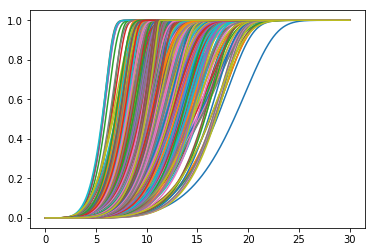

In [6]:
plt.figure()
for n in range(len(m2)):
    plt.plot(t/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544)
plt.show()

In [7]:
thresh = 2772
ttdwt = []
for j in range(len(m2)):
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100               

In [8]:
solverwtm1p3kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1p3kd  = solverwtm1p3kd.run(param_values=m1p3kd, num_processors = 20)
mode1df_p3kd = mode1wtm1p3kd.dataframe

2022-01-16 22:37:48.641 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 22:37:48.646 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 22:37:48.680 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 22:37:48.883 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 22:41:56.862 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 22:41:56.864 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 22:41:59.358 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [9]:
thresh = 2772
ttdp3kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_p3kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3kd.append(mode1df_p3kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3kd.append(np.inf)
for i in range(len(ttdp3kd)):
    if ttdp3kd[i] == np.inf:
        ttdp3kd[i] = 2100  

In [10]:
solverp3oe= ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p3oe  = solverp3oe.run(param_values=m1p3oe, num_processors = 20)
mode1df_p3oe  = mode1p3oe.dataframe

2022-01-16 22:45:57.092 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 22:45:57.098 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 22:45:57.134 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 22:45:57.339 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 22:50:05.200 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 22:50:05.201 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 22:50:07.699 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [11]:
thresh = 2772
ttdp3oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_p3oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3oe.append(mode1df_p3oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3oe.append(np.inf)
for i in range(len(ttdp3oe)):
    if ttdp3oe[i] == np.inf:
        ttdp3oe[i] = 2100  

In [12]:
solverm1p12kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12kd  = solverm1p12kd.run(param_values=m1p12kd, num_processors = 20)
mode1df_m1p12kd = mode1m1p12kd.dataframe

2022-01-16 22:54:33.593 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 22:54:33.599 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 22:54:33.634 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 22:54:33.838 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 22:58:49.394 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 22:58:49.396 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 22:58:51.864 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [13]:
thresh = 2772
ttdm1p12kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p12kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12kd.append(mode1df_m1p12kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12kd.append(np.inf)
for i in range(len(ttdm1p12kd)):
    if ttdm1p12kd[i] == np.inf:
        ttdm1p12kd[i] = 2100               

In [14]:
solverm1p12oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12oe  = solverm1p12oe.run(param_values=m1p12oe, num_processors = 20)
mode1df_m1p12oe = mode1m1p12oe.dataframe

2022-01-16 23:05:07.760 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:05:07.765 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:05:07.800 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:05:08.012 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:09:26.891 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:09:26.892 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:09:29.259 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [15]:
thresh = 2772
ttdm1p12oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p12oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12oe.append(mode1df_m1p12oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12oe.append(np.inf)
for i in range(len(ttdm1p12oe)):
    if ttdm1p12oe[i] == np.inf:
        ttdm1p12oe[i] = 2100               

In [16]:
solverm1p13kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13kd  = solverm1p13kd.run(param_values=m1p13kd, num_processors = 20)
mode1df_m1p13kd = mode1m1p13kd.dataframe

2022-01-16 23:12:30.664 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:12:30.669 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:12:30.702 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:12:30.904 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:16:49.711 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:16:49.712 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:16:52.223 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [17]:
thresh = 2772
ttdm1p13kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p13kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13kd.append(mode1df_m1p13kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13kd.append(np.inf)
for i in range(len(ttdm1p13kd)):
    if ttdm1p13kd[i] == np.inf:
        ttdm1p13kd[i] = 2100    

In [19]:
solverm1p13oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13oe  = solverm1p13oe.run(param_values=m1p13oe, num_processors = 20)
mode1df_m1p13oe = mode1m1p13oe.dataframe

2022-01-17 10:27:28.630 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:27:28.641 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:27:28.712 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:27:28.944 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:31:46.784 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:31:46.785 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:31:49.168 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [20]:
thresh = 2772
ttdm1p13oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p13oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13oe.append(mode1df_m1p13oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13oe.append(np.inf)
for i in range(len(ttdm1p13oe)):
    if ttdm1p13oe[i] == np.inf:
        ttdm1p13oe[i] = 2100    

In [21]:
solverm1p15kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p15kd  = solverm1p15kd.run(param_values=m1p15kd, num_processors = 20)
mode1df_m1p15kd = mode1m1p15kd.dataframe

2022-01-17 12:11:35.336 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:11:35.341 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:11:35.376 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:11:35.580 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:15:55.021 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:15:55.022 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:15:57.441 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [22]:
thresh = 2772
ttdm1p15kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p15kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p15kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p15kd.append(mode1df_m1p15kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p15kd.append(np.inf)
for i in range(len(ttdm1p15kd)):
    if ttdm1p15kd[i] == np.inf:
        ttdm1p15kd[i] = 2100    

In [23]:
solverm1p15oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p15oe = solverm1p15oe.run(param_values=m1p15oe, num_processors = 20)
mode1df_mm1p15oe = mode1m1p15oe.dataframe

2022-01-17 12:19:45.727 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:19:45.732 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:19:45.766 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:19:45.974 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:24:01.331 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:24:01.332 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:24:03.696 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [24]:
thresh = 2772
ttdm1p15oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_mm1p15oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_mm1p15oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p15oe.append(mode1df_mm1p15oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p15oe.append(np.inf)
for i in range(len(ttdm1p15oe)):
    if ttdm1p15oe[i] == np.inf:
        ttdm1p15oe[i] = 2100   

In [25]:
solverm1p16kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p16kd  = solverm1p16kd.run(param_values=m1p16kd, num_processors = 20)
mode1df_m1p16kd = mode1m1p16kd.dataframe

2022-01-17 12:28:42.629 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:28:42.635 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:28:42.670 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:28:42.875 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:32:58.888 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:32:58.890 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:33:01.283 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [26]:
thresh = 2772
ttdm1p16kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p16kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p16kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p16kd.append(mode1df_m1p16kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p16kd.append(np.inf)
for i in range(len(ttdm1p16kd)):
    if ttdm1p16kd[i] == np.inf:
        ttdm1p16kd[i] = 2100   

In [27]:
solverm1p16oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p16oe  = solverm1p16oe.run(param_values=m1p16oe, num_processors = 20)
mode1df_m1p16oe = mode1m1p16oe.dataframe

2022-01-17 12:37:16.934 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:37:16.942 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:37:16.997 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:37:17.365 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:41:37.202 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:41:37.203 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:41:39.815 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [28]:
thresh = 2772
ttdm1p16oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p16oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p16oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p16oe.append(mode1df_m1p16oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p16oe.append(np.inf)
for i in range(len(ttdm1p16oe)):
    if ttdm1p16oe[i] == np.inf:
        ttdm1p16oe[i] = 2100   

In [29]:
solverm1p17kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p17kd  = solverm1p17kd.run(param_values=m1p17kd, num_processors = 20)
mode1df_m1p17kd = mode1m1p17kd.dataframe

2022-01-17 12:45:39.951 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:45:39.957 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:45:39.992 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:45:40.199 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:49:58.292 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:49:58.294 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:50:00.847 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [30]:
thresh = 2772
ttdm1p17kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p17kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p17kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p17kd.append(mode1df_m1p17kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p17kd.append(np.inf)
for i in range(len(ttdm1p17kd)):
    if ttdm1p17kd[i] == np.inf:
        ttdm1p17kd[i] = 2100   

In [31]:
solverm1p17oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p17oe  = solverm1p17oe.run(param_values=m1p17oe, num_processors = 20)
mode1df_m1p17oe = mode1m1p17oe.dataframe

2022-01-17 12:54:39.373 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 12:54:39.378 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 12:54:39.419 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 12:54:39.629 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 12:59:00.843 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 12:59:00.845 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 12:59:03.680 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [32]:
thresh = 2772
ttdm1p17oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p17oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p17oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p17oe.append(mode1df_m1p17oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p17oe.append(np.inf)
for i in range(len(ttdm1p17oe)):
    if ttdm1p17oe[i] == np.inf:
        ttdm1p17oe[i] = 2100   

In [33]:
solverm1p18kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p18kd  = solverm1p18kd.run(param_values=m1p18kd, num_processors = 20)
mode1df_m1p18kd = mode1m1p18kd.dataframe

2022-01-17 13:03:04.814 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:03:04.819 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:03:04.854 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:03:05.060 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:07:26.567 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:07:26.568 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:07:28.956 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [34]:
thresh = 2772
ttdm1p18kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p18kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p18kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p18kd.append(mode1df_m1p18kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p18kd.append(np.inf)
for i in range(len(ttdm1p18kd)):
    if ttdm1p18kd[i] == np.inf:
        ttdm1p18kd[i] = 2100   

In [35]:
solverm1p18oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p18oe  = solverm1p18oe.run(param_values=m1p18oe, num_processors = 20)
mode1df_m1p18oe = mode1m1p18oe.dataframe

2022-01-17 13:11:30.239 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:11:30.245 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:11:30.280 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:11:30.489 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:15:51.205 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:15:51.206 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:15:53.621 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [36]:
thresh = 2772
ttdm1p18oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p18oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p18oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p18oe.append(mode1df_m1p18oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p18oe.append(np.inf)
for i in range(len(ttdm1p18oe)):
    if ttdm1p18oe[i] == np.inf:
        ttdm1p18oe[i] = 2100   

In [37]:
solverm1p19kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p19kd  = solverm1p19kd.run(param_values=m1p19kd, num_processors = 20)
mode1df_m1p19kd = mode1m1p19kd.dataframe

2022-01-17 13:20:00.709 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:20:00.714 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:20:00.749 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:20:01.007 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:24:22.089 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:24:22.091 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:24:24.538 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [38]:
thresh = 2772
ttdm1p19kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p19kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p19kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p19kd.append(mode1df_m1p19kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p19kd.append(np.inf)
for i in range(len(ttdm1p19kd)):
    if ttdm1p19kd[i] == np.inf:
        ttdm1p19kd[i] = 2100   

In [39]:
solverm1p19oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p19oe  = solverm1p19oe.run(param_values=m1p19oe, num_processors = 20)
mode1df_m1p19oe = mode1m1p19oe.dataframe

2022-01-17 13:28:30.980 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:28:30.985 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:28:31.021 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:28:31.225 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:32:49.776 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:32:49.778 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:32:52.171 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [40]:
thresh = 2772
ttdm1p19oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p19oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p19oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p19oe.append(mode1df_m1p19oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p19oe.append(np.inf)
for i in range(len(ttdm1p19oe)):
    if ttdm1p19oe[i] == np.inf:
        ttdm1p19oe[i] = 2100   

In [41]:
solverm1p20kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p20kd  = solverm1p20kd.run(param_values=m1p20kd, num_processors = 20)
mode1df_m1p20kd = mode1m1p20kd.dataframe

2022-01-17 13:36:51.779 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:36:51.784 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:36:51.819 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:36:52.024 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:41:12.664 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:41:12.665 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:41:15.144 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [42]:
thresh = 2772
ttdm1p20kd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p20kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p20kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p20kd.append(mode1df_m1p20kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p20kd.append(np.inf)
for i in range(len(ttdm1p20kd)):
    if ttdm1p20kd[i] == np.inf:
        ttdm1p20kd[i] = 2100   

In [43]:
solverm1p20oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p20oe  = solverm1p20oe.run(param_values=m1p20oe, num_processors = 20)
mode1df_m1p20oe = mode1m1p20oe.dataframe

2022-01-17 13:45:23.337 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 13:45:23.342 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 13:45:23.378 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 13:45:23.585 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 13:49:45.748 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 13:49:45.749 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 13:49:48.252 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [44]:
thresh = 2772
ttdm1p20oe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_m1p20oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p20oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p20oe.append(mode1df_m1p20oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p20oe.append(np.inf)
for i in range(len(ttdm1p20oe)):
    if ttdm1p20oe[i] == np.inf:
        ttdm1p20oe[i] = 2100   

In [45]:
ttdwt2 = [ttdwt / 60 for ttdwt in ttdwt]
ttdm1p3kd2 = [ttdp3kd / 60 for ttdp3kd in ttdp3kd]
ttdm1p12kd2 = [ttdm1p12kd / 60 for ttdm1p12kd in ttdm1p12kd]
ttdm1p13kd2 = [ttdm1p13kd / 60 for ttdm1p13kd in ttdm1p13kd]
ttdm1p15kd2 = [ttdm1p15kd / 60 for ttdm1p15kd in ttdm1p15kd]
ttdm1p16kd2 = [ttdm1p16kd / 60 for ttdm1p16kd in ttdm1p16kd]
ttdm1p17kd2 = [ttdm1p17kd / 60 for ttdm1p17kd in ttdm1p17kd]
ttdm1p18kd2 = [ttdm1p18kd / 60 for ttdm1p18kd in ttdm1p18kd]
ttdm1p19kd2 = [ttdm1p19kd / 60 for ttdm1p19kd in ttdm1p19kd]
ttdm1p20kd2 = [ttdm1p20kd / 60 for ttdm1p20kd in ttdm1p20kd]

In [46]:
ttdm1p3oe2 = [ttdp3oe / 60 for ttdp3oe in ttdp3oe]
ttdm1p12oe2 = [ttdm1p12oe / 60 for ttdm1p12oe in ttdm1p12oe]
ttdm1p13oe2 = [ttdm1p13oe/ 60 for ttdm1p13oe in ttdm1p13oe]
ttdm1p15oe2 = [ttdm1p15oe / 60 for ttdm1p15oe in ttdm1p15oe]
ttdm1p16oe2 = [ttdm1p16oe/ 60 for ttdm1p16oe in ttdm1p16oe]
ttdm1p17oe2 = [ttdm1p17oe/ 60 for ttdm1p17oe in ttdm1p17oe]
ttdm1p18oe2 = [ttdm1p18oe / 60 for ttdm1p18oe in ttdm1p18oe]
ttdm1p19oe2 = [ttdm1p19oe / 60 for ttdm1p19oe in ttdm1p19oe]
ttdm1p20oe2 = [ttdm1p20oe / 60 for ttdm1p20oe in ttdm1p20oe]

In [159]:
print(ttdwt2.count(35))
print(ttdm1p3kd2.count(35))
print(ttdm1p12kd2.count(35))
print(ttdm1p13kd2.count(35))
print(ttdm1p15kd2.count(35))
print(ttdm1p16kd2.count(35))
print(ttdm1p17kd2.count(35))
print(ttdm1p18kd2.count(35))
print(ttdm1p19kd2.count(35))
print(ttdm1p20kd2.count(35))
print('')
print(ttdm1p3oe2.count(35))
print(ttdm1p12oe2.count(35))
print(ttdm1p13oe2.count(35))
print(ttdm1p15oe2.count(35))
print(ttdm1p16oe2.count(35))
print(ttdm1p17oe2.count(35))
print(ttdm1p18oe2.count(35))
print(ttdm1p19oe2.count(35))
print(ttdm1p20oe2.count(35))

12
8
1
12
8
11
6
10
11
11

7
7
10
7
9
19
12
20
8


In [47]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2 = pd.DataFrame({'WT': ttdwt2,
                         'P3 KD': ttdm1p3kd2,'P3 OE': ttdm1p3oe2,'P12 KD': ttdm1p12kd2,'P12 OE': ttdm1p12oe2,
                        'P13 KD': ttdm1p13kd2, 'P13 OE': ttdm1p13oe2, 'P15 KD': ttdm1p15kd2, 'P15 OE': ttdm1p15oe2,
                        'P16 KD': ttdm1p16kd2,'P16 OE': ttdm1p16oe2,'P17 KD': ttdm1p17kd2,'P17 OE': ttdm1p17oe2,
                        'P18 KD': ttdm1p18kd2,'P18 OE': ttdm1p18oe2,'P19 KD': ttdm1p19kd2,'P19 OE': ttdm1p19oe2,
                     'P20 KD': ttdm1p20kd2,'P20 OE': ttdm1p20oe2})
dfclus2hr = pd.DataFrame(data = mode2,
                        columns = ['WT','P3 KD','P3 OE','P12 KD','P12 OE','P13 KD', 'P13 OE', 'P15 KD',
                                  'P15 OE', 'P16 KD','P16 OE','P17 KD','P17 OE','P18 KD','P18 OE',
                                  'P19 KD','P19 OE','P20 KD','P20 OE'])

In [152]:
dfclus2hr.to_csv("mode2_allparamsensdf_ttds.csv")

No handles with labels found to put in legend.


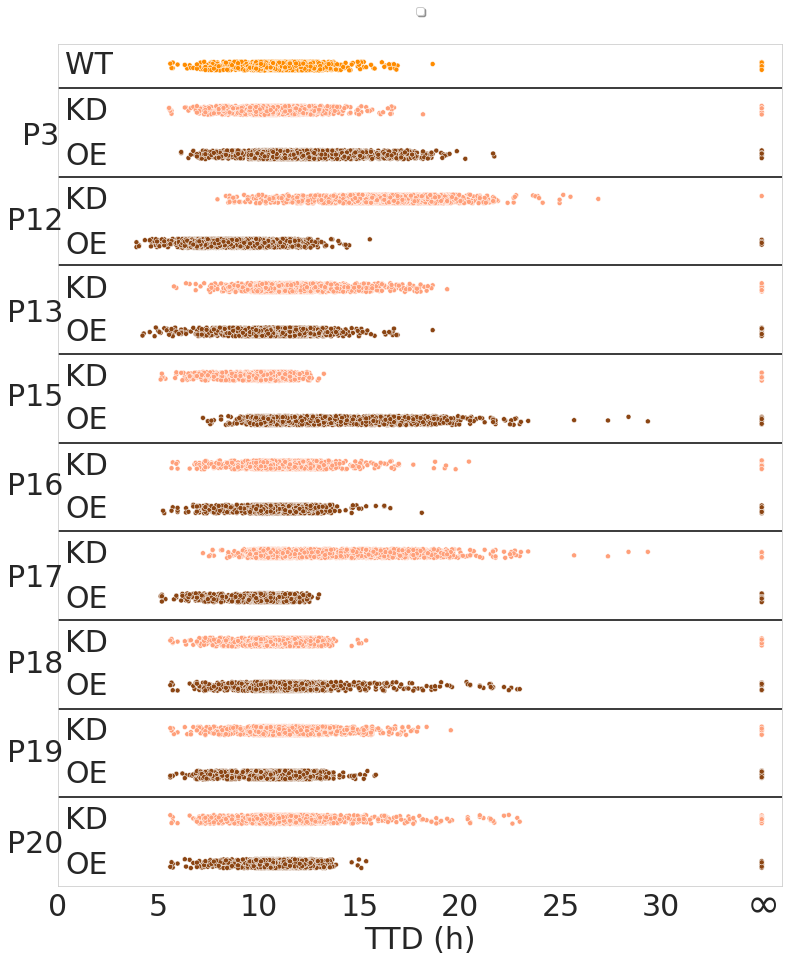

In [158]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (11,13))
my_pal = {"WT": "darkorange",
          'P3 KD': "lightsalmon",'P3 OE':"saddlebrown",
          'P12 KD': "lightsalmon",'P12 OE':"saddlebrown",
          'P13 KD': "lightsalmon",'P13 OE':"saddlebrown",
          'P15 KD': "lightsalmon",'P15 OE':"saddlebrown", 
          'P16 KD': "lightsalmon",'P16 OE':"saddlebrown",
          'P17 KD': "lightsalmon",'P17 OE':"saddlebrown",
          'P18 KD': "lightsalmon",'P18 OE':"saddlebrown",
          'P19 KD': "lightsalmon",'P19 OE':"saddlebrown",
          'P20 KD': "lightsalmon",'P20 OE':"saddlebrown"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 30)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.91), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.857), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.804), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.751), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.699), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.647), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.594), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.543), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.437), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.384), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.331), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.278), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.227), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)

plt.annotate('KD', xy = (0.01,.174), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.123), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.068), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.015), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)

# plt.axhline(y=18.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (-0.05,.88), xycoords ='axes fraction', fontsize = 30)#(-0.2,.7)
plt.annotate('P12', xy = (-0.07,.78), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.67), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('P15', xy = (-0.07,.57), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('P16', xy = (-0.07,.465), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('P17', xy = (-0.07,.355), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('P18', xy = (-0.07,.253), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate('P19', xy = (-0.07,.148), xycoords ='axes fraction', fontsize = 30) #(-0.2,.42)
plt.annotate('P20', xy = (-0.07,.039), xycoords ='axes fraction', fontsize = 30) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 40)
b.set_xlabel("TTD (h)",fontsize = 30)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=30)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_fontsize.pdf')

In [115]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2,
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'cIAP KD': ttdm2ciapkd2,a
                         'cIAP OE': ttdm2ciapoe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KD','A20 OE','cIAP KD','cIAP OE','CYLD KD','CYLD OE'])

SyntaxError: invalid syntax (<ipython-input-115-4cf83a2c7b69>, line 7)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "indianred", "cIAP KD": "lightsalmon", "cIAP OE": "mediumseagreen", 
          "A20 KD": "lightsalmon", "A20 OE": "mediumseagreen", 
          "CYLD KD": "lightsalmon", "CYLD OE": "mediumseagreen"}
# my_pal1 = {"wt0": "red", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfmode22), zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c2)):
    plt.plot(tspan, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue', alpha= 0.4)
#     plt.plot(tspan, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'orange', alpha = 0.25)
#     plt.plot(tspan, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.25)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (m)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 1800)
plt.ylim(ymin = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBACKD', 'LUBACOE'], prop={'size': 10}, loc = 'best')
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_linesmin.pdf')
plt.show() 

In [ ]:
ttdm2a20kd

In [ ]:
print(len(ttdm2wt))
print(len(ttdm2lubkd))
print(len(ttdm2luboe2))
print(len(ttdm2a20kd))
print(len(ttdm2a20oe))
print(len(ttdm2cyldoe))
print(len(ttdm2cyldkd))

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2ciap = pd.DataFrame({'KD': ttdm2ciapkd,
                         'OE': ttdm2ciapoe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
dfmode2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','WT','KD','OE'])
dfm2 = pd.melt(dfmode2, id_vars=["species"])

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
# sns.stripplot(data=mode2wt, orient = 'h',linewidth=0.5,size=10)
sns.stripplot(data=dfm2, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize = (12,7))
b = sns.boxplot(data=dfm2, palette="Set3", orient = 'h') #,showfliers = False, whis = 0)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm2, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm2, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm2, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.5})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.boxplot(x = 'variable', y = 'value', label ='WT',color=["red",'green'], bins=10, **kwargs, kde = True)
# g = sns.boxplot(y='variable',x='value',data=dfclus2n, showfliers=True, boxprops=dict(alpha=1))
g = sns.stripplot(y='variable',x='value',data=dfm22, 
                        marker="o", alpha=0.3, order=['WT', 'LUBACKD','LUBACOE','A20KD', 'A20OE','CYLDKD', 'CYLDOE'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# sns.distplot(mode2_lubacoe, label = 'LUBAC KD',color="blue", bins=10, **kwargs, kde = True)
# sns.distplot(mode2_lubackd, label = 'LUBAC OE',color="green", bins=10, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (m)')
plt.ylabel('Species')
plt.legend(loc = 'best')
# plt.xlim(xmin = 1, xmax = 1000)
# ax.set_yticks([1, 1.5, 2])
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_strip.pdf')
plt.show()

In [ ]:
list(model.initial_conditions)

In [ ]:
solverkdm2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2fadd   = solverkdm2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):2695},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2fadd  = mode1kdm2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2kdfadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdfadd.append(mode1df_kdm2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdfadd.append(np.inf)
for i in range(len(ttdm2kdfadd)):
    if ttdm2kdfadd[i] == np.inf:
        ttdm2kdfadd[i] = 2100               

In [ ]:
solveroem2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2fadd  = solveroem2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):89860},
                                        param_values=m2, num_processors = 20)
mode1df_oem2fadd = mode1oem2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2oefadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oefadd.append(mode1df_oem2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oefadd.append(np.inf)
for i in range(len(ttdm2oefadd)):
    if ttdm2oefadd[i] == np.inf:
        ttdm2oefadd[i] = 2100               

In [ ]:
solverkdm2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2r3   = solverkdm2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):3196},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2r3  = mode1kdm2r3.dataframe

In [ ]:
thresh = 2772
ttdm2kdr3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdr3.append(mode1df_kdm2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdr3.append(np.inf)
for i in range(len(ttdm2kdr3)):
    if ttdm2kdr3[i] == np.inf:
        ttdm2kdr3[i] = 2100               

In [ ]:
solveroem2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2r3  = solveroem2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):106540},
                                        param_values=m2, num_processors = 20)
mode1df_oem2r3 = mode1oem2r3.dataframe

In [ ]:
thresh = 2772
ttdm2oer3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oer3.append(mode1df_oem2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oer3.append(np.inf)
for i in range(len(ttdm2oer3)):
    if ttdm2oer3[i] == np.inf:
        ttdm2oer3[i] = 2100               

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
mode2fadd = pd.DataFrame({'KD': ttdm2kdfadd,
                          'OE': ttdm2oefadd,
                        'species': 'fadd'})
mode2r3 = pd.DataFrame({'KD': ttdm2kdr3,
                          'OE': ttdm2oer3,
                        'species': 'rip3'})
framesm3 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','WT','KD','OE'])
dfm23 = pd.melt(dfmode3, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

In [ ]:
print(len(ttdm2wt))

In [ ]:
m4occurrenceswt = ttdm2wt.count(2100)
m4occurrenceslub = ttdm2lubkd.count(2100)
m4occurrencesfadd = ttdm2kdfadd.count(2100)
m4occurrencesr3 = ttdm2kdr3.count(2100)
print(m4occurrenceswt)
print(m4occurrenceslub)
print(m4occurrencesfadd)
print(m4occurrencesr3)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm23, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm23, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttdm2wt, 
                        'LUBAC KD': ttdm2lubkd,
                         'LUBAC OE': ttdm2luboe2,
                        'A20 KD': ttdm2a20kd,
                          'A20 OE': ttdm2a20oe,
                        'CYLD KD': ttdm2cyldkd,
                          'CYLD OE': ttdm2cyldoe})
dfclus0n = pd.DataFrame(data = mode1df,
                        columns = ['WT', 'LUBAC KD', 'LUBAC OE','A20 KD', 'A20 OE','CYLD KD', 'CYLD OE'])
dfclus1n = pd.melt(dfclus0n)

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',linewidth=0.5,size=5, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_stripdots.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_strip.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',zorder=2, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf.pdf')

In [ ]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [ ]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               